In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

Price        Date      Close           High            Low           Open      \
Ticker                    BP PLC         BP PLC         BP PLC         BP PLC   
0      2012-01-03  20.864983 NaN  20.940615 NaN  20.675904 NaN  20.699538 NaN   
1      2012-01-04  21.153334 NaN  21.162788 NaN  20.893349 NaN  21.020978 NaN   
2      2012-01-05  20.916979 NaN  20.997337 NaN  20.827166 NaN  20.916979 NaN   
3      2012-01-06  20.836622 NaN  21.077699 NaN  20.760988 NaN  21.072972 NaN   
4      2012-01-09  20.831900 NaN  20.841354 NaN  20.680636 NaN  20.808265 NaN   
...           ...        ...  ..        ...  ..        ...  ..        ...  ..   
2756   2022-12-14  31.077040 NaN  31.407456 NaN  30.934157 NaN  31.282434 NaN   
2757   2022-12-15  30.612667 NaN  30.934154 NaN  30.362623 NaN  30.835922 NaN   
2758   2022-12-16  30.076855 NaN  30.130437 NaN  29.594624 NaN  29.808950 NaN   
2759   2022-12-19  30.317972 NaN  30.612666 NaN  30.184018 NaN  30.559088 NaN   
2760   2022-12-20  30.434067 NaN  30.639461 NaN  30.237602 NaN  30.371552 NaN   

Price     Volume      
Ticker        BP PLC  
0        7315800 NaN  
1        6883900 NaN  
2        5570700 NaN  
3        5976000 NaN  
4        3641400 NaN  
...          ...  ..  
2756     7252800 NaN  
2757     7088500 NaN  
2758    10431900 NaN  
2759     7513300 NaN  
2760     5286300 NaN  

[2761 rows x 11 columns]

In [8]:
ma_100_days = data.Close.rolling(100).mean()

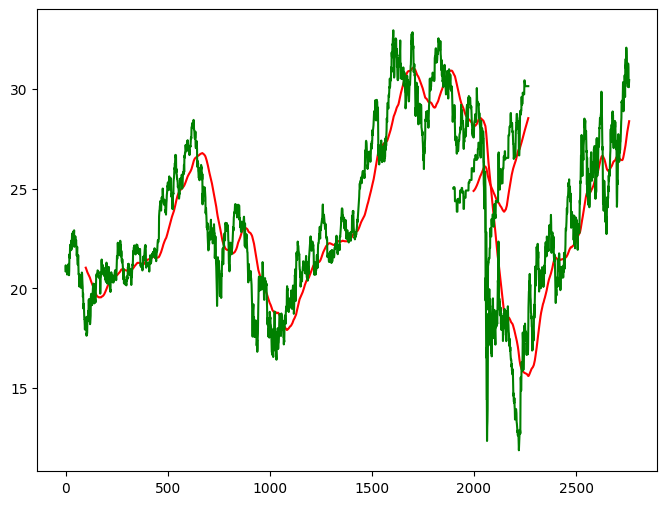

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

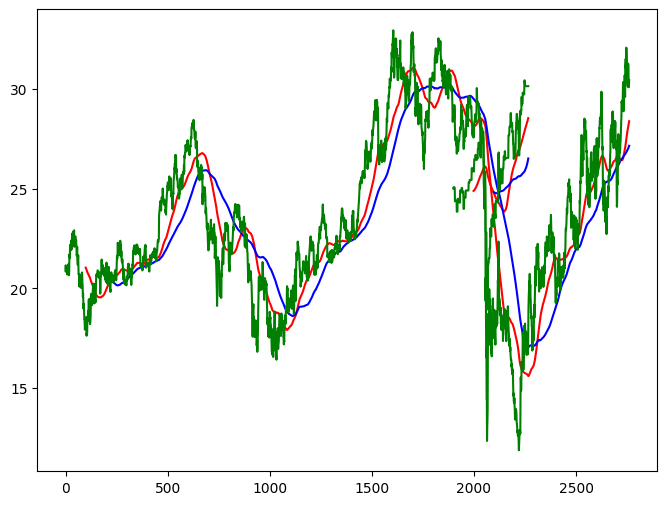

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

294

In [15]:
data_test.shape[0]

74

In [1]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 20, batch_size =32, verbose =1)

Epoch 1/20
66/66 [==============================] - 29s 362ms/step - loss: 0.0339
Epoch 2/20
22/66 [=========>....................] - ETA: 24s - loss: 0.0077

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [37]:
pas_100_days = data_train.tail(100)

In [38]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [40]:
data_test_scale  =  scaler.fit_transform(data_test)

In [43]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [44]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 42ms/step


In [49]:
scale =1/scaler.scale_

In [50]:
y_predict = y_predict*scale

In [51]:
y = y*scale

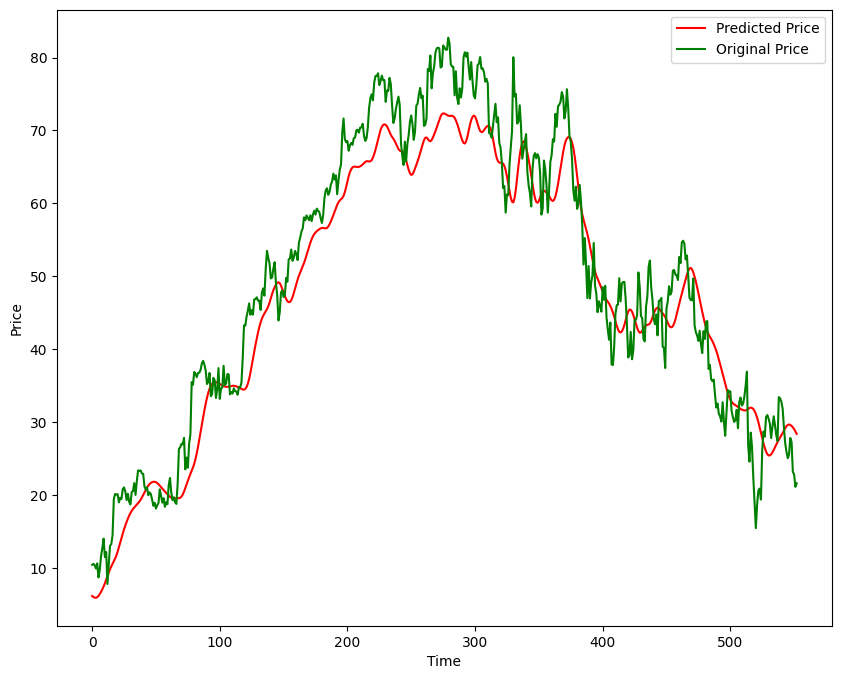

In [53]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [54]:
model.save('Stock Predictions Model.keras')